# Mapeando el Universo



## Aprendizaje No Supervisado

### Clasificación del tipo morfológico de galaxias

  * Implementar algoritmos de _clustering_ para encontrar conjuntos de datos con propiedades similares.
  
    + Elegir un subconjunto de columnas a su elección (excluir los datos espectroscópicos) y aplicar al menos dos algoritmos de _clustering_ (k-means y dbscan, por ejemplo)
    + Analizar/determinar el número de _clusters_ que pueden ser identificados
    + Comparar los _clusters_ encontrados contra la clasificación del tipo morfológico de galaxias 
        
**EXTRA**: Explorar los métodos de _embeddings_ para ver si es posible reducir la dimensión del problema o encontrar otro espacio en el cual la separación en tipo morfológicos sea más sencilla.
    
   

### Lectura de datos

In [14]:
# Importamos librerìas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import seaborn as sns
import psutil
from sklearn import datasets, linear_model
from sklearn.linear_model import (LinearRegression, SGDClassifier, Ridge, SGDRegressor)
from sklearn.preprocessing import (PolynomialFeatures, MinMaxScaler)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import (train_test_split, KFold, GridSearchCV)
from sklearn.metrics import (mean_squared_error, r2_score, precision_score, recall_score, f1_score, confusion_matrix)
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import os
import gc
import sys
import pkg_resources
import warnings
warnings.filterwarnings('ignore')

In [15]:
if 'psutil' not in {pkg.key for pkg in pkg_resources.working_set}:
    !pip install psutil
if 'scikit-learn' not in {pkg.key for pkg in pkg_resources.working_set}:
    !pip install scikit-learn
in_colab = 'google.colab' in sys.modules

def Memory():
    """Imprime la cantidad de memoria RAM utilizada por el proceso 
    hasta el momento, en GB"""
    gc.collect()
    process = psutil.Process(os.getpid())
    print('Memoria actual utilizada: %.2f GB' %(process.memory_full_info().rss*1e-9))
    return

In [16]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [17]:
filename = "dataset/data_filter.csv"

In [18]:
data = pd.read_csv(filename,index_col=0)

In [66]:
# Subsets según el tipo morfológico de las galaxias: data['morfologia']
data['morfologia'] = 'uncertain'
data.loc[data['elliptical']==1, 'morfologia'] = 'elliptical'
data.loc[data['spiral']==1, 'morfologia'] = 'spiral'
data = data[ (data['morfologia'] != 'uncertain')]

In [67]:
data.subClass = pd.Categorical(data.subClass)
data['subClass_n'] = data.subClass.cat.codes+1
data['subClass_n']

specObjID
957065537576265728    0
957066911965800448    0
637262958233151488    0
637265157256407040    0
637266806523848704    0
                     ..
676702991385913344    3
676703541141727232    0
676702441630099456    5
676702166752192512    5
676701891874285568    0
Name: subClass_n, Length: 1620, dtype: int8

In [68]:
data.describe()

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,subClass_null,modelColor_ug,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz,subClass_n
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,...,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000
mean,0.106753,142.333815,171.527190,26.126915,19.447628,17.662518,16.784747,16.356328,16.047322,19.465447,...,0.556173,1.785110,0.877771,0.428419,0.309006,1.765985,0.839173,0.398913,0.254886,2.022222
std,0.053737,74.848900,61.295043,25.245103,1.243897,0.867614,0.787679,0.779583,0.781532,1.481699,...,0.496988,0.835766,0.255002,0.106710,0.113120,1.125410,0.266398,0.232314,0.274052,2.378512
min,0.010808,0.000000,1.119497,-10.957087,16.284610,15.115270,14.283960,13.841320,13.511200,16.149780,...,0.000000,0.156720,0.057040,-2.536140,-0.982840,0.026420,0.138190,-7.815450,-3.252540,0.000000
25%,0.066463,91.450315,139.166467,3.540869,18.751280,17.146417,16.332883,15.898998,15.582335,18.674925,...,0.000000,1.397643,0.703685,0.391512,0.267987,1.281108,0.654710,0.360290,0.199880,0.000000
50%,0.099965,134.033350,172.138751,14.438918,19.436600,17.837615,16.999280,16.565870,16.251615,19.361315,...,1.000000,1.729485,0.879275,0.434805,0.323960,1.568970,0.834310,0.413320,0.273375,0.000000
75%,0.139330,185.102900,214.617462,52.197470,20.113055,18.323663,17.398775,16.959780,16.648870,20.062042,...,1.000000,1.966318,1.027780,0.478373,0.359877,1.859773,0.999290,0.456860,0.328752,5.000000
max,0.320333,850.000000,359.654873,65.902372,27.541680,19.307110,17.854840,20.002060,17.371390,31.392440,...,1.000000,11.869260,1.704920,0.744950,3.237510,15.470980,1.861700,1.110520,8.056400,6.000000


In [69]:
data.columns

Index(['z', 'velDisp', 'ra', 'dec', 'subClass', 'modelMag_u', 'modelMag_g',
       'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroMag_u', 'petroMag_g',
       'petroMag_r', 'petroMag_i', 'petroMag_z', 'deVRad_u', 'deVRad_g',
       'deVRad_r', 'deVRad_i', 'deVRad_z', 'expRad_u', 'expRad_g', 'expRad_r',
       'expRad_i', 'expRad_z', 'petroRad_u', 'petroRad_g', 'petroRad_r',
       'petroRad_i', 'petroRad_z', 'spiral', 'elliptical', 'uncertain',
       'subClass_AGN', 'subClass_AGN_BROADLINE', 'subClass_BROADLINE',
       'subClass_STARBURST', 'subClass_STARBURST_BROADLINE',
       'subClass_STARFORMING', 'subClass_STARFORMING_BROADLINE',
       'subClass_null', 'modelColor_ug', 'modelColor_gr', 'modelColor_ri',
       'modelColor_iz', 'petroColor_ug', 'petroColor_gr', 'petroColor_ri',
       'petroColor_iz', 'morfologia', 'subClass_n'],
      dtype='object')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 957065537576265728 to 676701891874285568
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   z                               1620 non-null   float64 
 1   velDisp                         1620 non-null   float64 
 2   ra                              1620 non-null   float64 
 3   dec                             1620 non-null   float64 
 4   subClass                        719 non-null    category
 5   modelMag_u                      1620 non-null   float64 
 6   modelMag_g                      1620 non-null   float64 
 7   modelMag_r                      1620 non-null   float64 
 8   modelMag_i                      1620 non-null   float64 
 9   modelMag_z                      1620 non-null   float64 
 10  petroMag_u                      1620 non-null   float64 
 11  petroMag_g                      1620 non-null   flo

### 02 - Set de datos

In [196]:
#-- Jugar con esta lista, agregar o sacar o cambiar las columnas.

# Set de 21 variables que incluyen las magnitudes y colores model_mag
filter_col_01=['z','subClass_n'];
#filter_col_01 = []
#filter_col_01.extend([col for col in data if col.startswith(('z','subClass_n'))])

In [197]:
print(filter_col_01)

['z', 'subClass_n']


In [198]:
data = data[0:5000]

In [199]:
from sklearn import cluster, decomposition, preprocessing
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

data_columns = data[filter_col_01]
print(data_columns)
std_scale = preprocessing.MinMaxScaler().fit_transform(data_columns.values)
data_columns = pd.DataFrame(std_scale)
print(data_columns)

                           z  subClass_n
specObjID                               
957065537576265728  0.140137           0
957066911965800448  0.066672           0
637262958233151488  0.098105           0
637265157256407040  0.213984           0
637266806523848704  0.098102           0
...                      ...         ...
676702991385913344  0.116974           3
676703541141727232  0.105216           0
676702441630099456  0.104480           5
676702166752192512  0.091028           5
676701891874285568  0.281078           0

[1620 rows x 2 columns]
             0         1
0     0.417830  0.000000
1     0.180482  0.000000
2     0.282034  0.000000
3     0.656414  0.000000
4     0.282025  0.000000
...        ...       ...
1615  0.342995  0.500000
1616  0.305009  0.000000
1617  0.302630  0.833333
1618  0.259171  0.833333
1619  0.873177  0.000000

[1620 rows x 2 columns]


In [200]:
graf1 = go.Scatter(x=data_columns[0], y=data_columns[1],
                        mode='markers',
                        marker=dict(
                            size=5)
                        )

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=graf1, layout=layout)

iplot(fig)

### 03 - Clustering con K-Means

In [201]:
from sklearn import cluster, decomposition, preprocessing
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

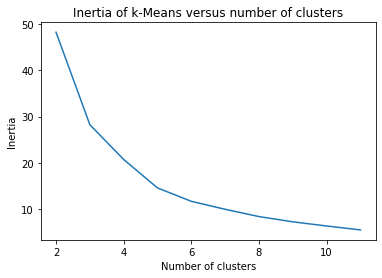

In [202]:
scores = [KMeans(n_clusters=i+2).fit(data_columns).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [203]:
# Número de clusters buscado
n_clust = 2

km = KMeans(n_clusters=n_clust, random_state=42)
km.fit(data_columns)

# Recuperacion de etiquetas
clusters = km.labels_
print(clusters)
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

[0 0 0 ... 1 1 0]
Suma de los cuadrados de las distancias al cluster / Inertia:  48.22813903534092


In [204]:

kmean_clusters = go.Scatter(x=data_columns[0], y=data_columns[1],
                           mode='markers',
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=kmean_clusters, layout=layout)

iplot(fig)

In [205]:
clusters=data.copy()
clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')

clusters.groupby('kmeans').size()

Kmeans encontró:  2 clusters, nosotros lo forzamos


kmeans
0    956
1    664
dtype: int64

In [206]:
pd.crosstab(clusters.morfologia,clusters.kmeans)

kmeans,0,1
morfologia,,
elliptical,402,34
spiral,554,630


Para n_clusters = 2 El silhouette_score promedio es : 0.7600448978609091


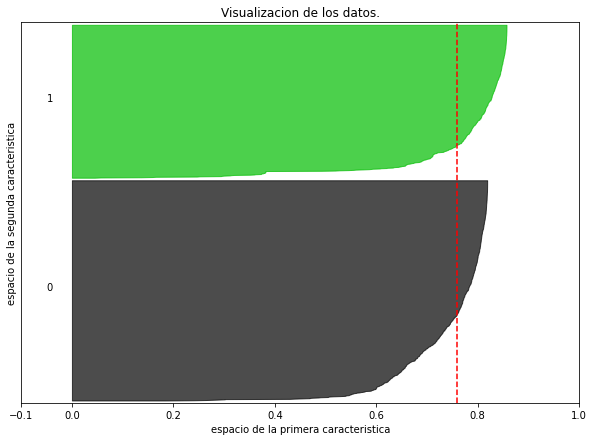

In [207]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

for i in range(1):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_columns) + (n_clust + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = km
    cluster_labels = km.labels_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_columns, cluster_labels)
    print("Para n_clusters =", n_clust,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_columns, cluster_labels)

    y_lower = 10
    for i in range(n_clust):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clust)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

### 04 - Clustering con DBSCAN

In [208]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [232]:
db = DBSCAN(eps=0.1, min_samples=5).fit(data_columns)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


In [233]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data_columns, labels))

Estimated number of clusters: 5
Estimated number of noise points: 15
Silhouette Coefficient: 0.309


In [234]:
clusters['dbscan'] = labels
print('DBSCAN encontró: ', max(labels)+1, 'clusters, nosotros lo forzamos')

clusters.groupby('dbscan').size()

DBSCAN encontró:  5 clusters, nosotros lo forzamos


dbscan
-1     15
 0    901
 1    586
 2     47
 3     46
 4     25
dtype: int64

In [235]:

dbscan_clusters = go.Scatter(x=data_columns[0], y=data_columns[1],
                           mode='markers',
                           marker=dict(
                                size=5,
                                color = labels.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

layout = go.Layout(title="Clustering DBSCAN ",titlefont=dict(size=20),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=kmean_clusters, layout=layout)

iplot(fig)

In [236]:
pd.crosstab(clusters.morfologia,clusters.dbscan)

dbscan,-1,0,1,2,3,4
morfologia,,,,,,
elliptical,8,396,11,1,3,17
spiral,7,505,575,46,43,8


Para n_clusters = 5 El silhouette_score promedio es : 0.30891790313366024


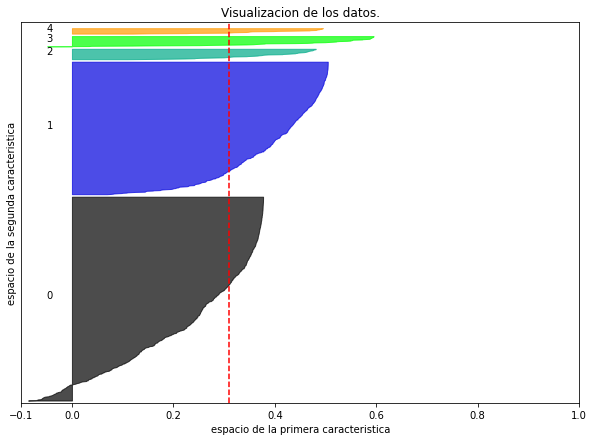

In [240]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

for i in range(1):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_columns) + (n_clusters_ + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = db
    cluster_labels = labels

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_columns, cluster_labels)
    print("Para n_clusters =", n_clusters_,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_columns, cluster_labels)

    y_lower = 10
    for i in range(n_clusters_):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters_)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])